# 5a. Re-run the model on GBR with log-differenced updated data and using Enerdata

In [1]:
from IPython.display import display, HTML
import matplotlib as mpl
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import scipy
import os
import pandas as pd
import seaborn as sns
sns.set(style='ticks', rc={'axes.grid':True,
                           'xtick.labelsize': 'medium',
                           'ytick.labelsize': 'medium',
#                            'font.size': 15,
                          })

analysis_dir = os.getcwd()
assert analysis_dir.endswith(os.path.join('em-2020','analysis'))
plot_dir = os.path.realpath(os.path.join(analysis_dir, '..', 'tex', 'plots'))
data_dir = os.path.realpath(os.path.join(analysis_dir, '..', 'data'))

In [2]:
suppressMessages({
library(lavaan)
library(semPlot)
library(semTools)
library(MVN)
library(Hmisc)
library(data.table)
library(dplyr)
library(tseries)
})

In [3]:
%get data_dir --from em-2020
cols <- c('year', 'ISG', 'TO', 'TI', 'P_GDPb', 'EIc')
data.raw <- read.csv(file.path(data_dir, 'WB_GBR_current.csv'))[cols]

log_cols <- c('EIc', 'P_GDPb', 'TI')
data.log <- copy(data.raw)
data.log[log_cols] <- log(data.raw[log_cols])
data.logdiff <- cbind(data.raw[-1,'year', drop=FALSE], diff(as.matrix(subset(data.log, select=-year))))

data <- subset(data.raw, year >= 1986 & year <= 2015)
data.log <- subset(data.log, year >= 1986 & year <= 2015)
data.logdiff <- subset(data.logdiff, year >= 1986 & year <= 2015)

data.logdiff

,year,ISG,TO,TI,P_GDPb,EIc
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
27,1986,NA,-4.38946840,-0.027337277,NA,NA
28,1987,NA,-0.62762212,-0.024046581,NA,NA
29,1988,NA,-2.50753889,0.003517715,NA,NA
30,1989,NA,1.31178082,-0.036835715,NA,NA
31,1990,NA,-0.43517382,-0.039271108,NA,NA
32,1991,-0.723565269,-2.92680399,-0.023323941,0.01924082,0.045057279
33,1992,-0.406029934,0.98688841,-0.033168092,0.02356237,-0.005827031
34,1993,-0.592403207,3.42168804,-0.001424929,0.04597413,-0.014764703
35,1994,0.526977551,2.12444865,-0.006928521,0.05664909,-0.006843978


In [4]:
summary(lm('TI ~ ISG', data=data.logdiff))


Call:
lm(formula = "TI ~ ISG", data = data.logdiff)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.07079 -0.02233  0.00200  0.02547  0.07830 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept) -0.012793   0.009554  -1.339    0.194
ISG         -0.010860   0.014337  -0.758    0.456

Residual standard error: 0.03872 on 23 degrees of freedom
  (5 observations deleted due to missingness)
Multiple R-squared:  0.02434,	Adjusted R-squared:  -0.01808 
F-statistic: 0.5738 on 1 and 23 DF,  p-value: 0.4564


In [5]:
summary(lm('P_GDPb ~ TO', data=data.logdiff))


Call:
lm(formula = "P_GDPb ~ TO", data = data.logdiff)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.076846 -0.007701 -0.000491  0.013608  0.032951 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.036270   0.004598   7.889 5.45e-08 ***
TO          0.003187   0.001941   1.642    0.114    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.02274 on 23 degrees of freedom
  (5 observations deleted due to missingness)
Multiple R-squared:  0.1049,	Adjusted R-squared:  0.06603 
F-statistic: 2.697 on 1 and 23 DF,  p-value: 0.1142


In [6]:
summary(lm('EIc ~ ISG + TO + TI + P_GDPb', data=data.logdiff))


Call:
lm(formula = "EIc ~ ISG + TO + TI + P_GDPb", data = data.logdiff)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.071210 -0.011355  0.003888  0.014276  0.072556 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept) -0.0126626  0.0157077  -0.806    0.430
ISG          0.0131907  0.0145270   0.908    0.375
TO           0.0004911  0.0035527   0.138    0.891
TI           0.0045563  0.1912444   0.024    0.981
P_GDPb      -0.1947766  0.3209950  -0.607    0.551

Residual standard error: 0.03348 on 20 degrees of freedom
  (5 observations deleted due to missingness)
Multiple R-squared:  0.06447,	Adjusted R-squared:  -0.1226 
F-statistic: 0.3446 on 4 and 20 DF,  p-value: 0.8446


In [7]:
model.path <- '
## path model
EIc ~ p_eic_isg*ISG + p_eic_to*TO + p_eic_ti*TI + p_eic_pgdpb*P_GDPb
TI ~ p_ti_isg*ISG
P_GDPb ~ p_pgdpb_to*TO
## indirect effect
p_eic_ti_isg := p_eic_ti*p_ti_isg
p_eic_pgdpb_to := p_eic_pgdpb*p_pgdpb_to
## total effect
p_eic_isg_total := p_eic_isg + (p_eic_ti*p_ti_isg)
p_eic_to_total := p_eic_to + (p_eic_pgdpb*p_pgdpb_to)
'

capture <- function(expr, file) {
    writeLines(c('\\begin{verbatim}', 
                 capture.output(expr),
                 '\\end{verbatim}'), con=file)
}
model.path.fit <- sem(model.path, data=data.logdiff, estimator='MLR', missing='ML', meanstructure=TRUE)
# capture(summary(model.path.fit, standardized=TRUE, header=TRUE,  fit.measures=TRUE, estimates=FALSE),
#         '../tex/plots/model.logdiff.fit.summary.tex')
# capture(summary(model.path.fit, standardized=TRUE, header=FALSE, estimates=TRUE),
#         '../tex/plots/model.logdiff.fit.estimates.tex')
summary(model.path.fit, standardized=TRUE, fit.measures=TRUE)

Warning message in lav_data_full(data = data, group = group, cluster = cluster, :
“lavaan WARNING: 5 cases were deleted due to missing values in 
		  exogenous variable(s), while fixed.x = TRUE.”


lavaan 0.6-5 ended normally after 73 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of free parameters                         12
                                                      
                                                  Used       Total
  Number of observations                            25          30
  Number of missing patterns                         1            
                                                                  
Model Test User Model:
                                              Standard      Robust
  Test Statistic                                 3.116       3.216
  Degrees of freedom                                 3           3
  P-value (Chi-square)                           0.374       0.360
  Scaling correction factor                                  0.969
    for the Yuan-Bentler correction (Mplus variant) 

Model Test Baseline Model:

  Test statistic       

In [8]:
soln.std <- as.data.frame(standardizedSolution(model.path.fit, se=TRUE, type='std.all', remove.def=FALSE))
fit.measures <- as.data.frame(fitMeasures(model.path.fit))
r.square <- lavInspect(model.path.fit, 'rsquare')
n.x <- 3

In [9]:
%get soln.std --from R
%get r.square --from R
%get fit.measures --from R
display(np.round(soln_std, 3))
display(r_square)

Variable soln.std is put to SoS as soln_std
Variable r.square is put to SoS as r_square
Variable fit.measures is put to SoS as fit_measures


,lhs,op,rhs,est.std,se,z,pvalue,ci.lower,ci.upper
0,EIc,~,ISG,0.230,0.131,1.755,0.079,-0.027,0.486
1,EIc,~,TO,0.037,0.349,0.106,0.915,-0.646,0.721
2,EIc,~,TI,0.006,0.183,0.030,0.976,-0.353,0.364
3,EIc,~,P_GDPb,-0.145,0.191,-0.759,0.448,-0.518,0.229
4,TI,~,ISG,-0.156,0.174,-0.895,0.371,-0.498,0.186
5,P_GDPb,~,TO,0.324,0.123,2.631,0.009,0.083,0.565
6,EIc,~~,EIc,0.931,0.086,10.814,0.000,0.762,1.100
7,TI,~~,TI,0.976,0.054,17.944,0.000,0.869,1.082
8,P_GDPb,~~,P_GDPb,0.895,0.080,11.221,0.000,0.739,1.051
9,ISG,~~,ISG,1.000,0.000,NaN,NaN,1.000,1.000


EIc       0.068897
TI        0.024341
P_GDPb    0.104946
dtype: float64

In [10]:
df = soln_std.query('(lhs != rhs) & (op == "~")').copy()
df.index = np.where(df.op == '~', df.lhs.str.cat([df.op, df.rhs], sep=' '), df.lhs)
df = df.loc[['TI ~ ISG', 'P_GDPb ~ TO', 'EIc ~ ISG', 'EIc ~ TO', 'EIc ~ TI', 'EIc ~ P_GDPb']]
df['Equation'] = ['1', '2', '3', '', '', '']
df['Dep. var.'] = df.lhs.str.replace('P_GDPb', r'P\_GDPb')
df['Ind. var.'] = df.rhs.str.replace('P_GDPb', r'P\_GDPb')
df['Coefficient'] = ('$P_{' + df.lhs + ',' + df.rhs + '}$').str.replace('P_GDPb', r'P\_GDPb')
df['Est. (std.)'] = np.round(df['est.std'],3)
df['S.E. (std.)'] = np.round(df['se'],3)
df['p-value'] = ['{:.3f}'.format(x) if x >= 0.001 else '*' for x in df['pvalue']]
df['$R^{2}$'] = ''
df['$R^{2}$'].iloc[0:3] = ['{:.3f}'.format(x) for x in r_square.loc[['TI', 'P_GDPb', 'EIc']]]
df = df[['Equation', 
         'Dep. var.', 'Ind. var.', 
         'Coefficient', 'Est. (std.)', 'S.E. (std.)', 'p-value', '$R^{2}$']]
display(df)
print(df.to_latex(escape=False, index=False))

/home/drake/.virtualenvs/em-2020/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Equation,Dep. var.,Ind. var.,Coefficient,Est. (std.),S.E. (std.),p-value,$R^{2}$
TI ~ ISG,1,TI,ISG,"$P_{TI,ISG}$",-0.156,0.174,0.371,0.024
P_GDPb ~ TO,2,P\_GDPb,TO,"$P_{P\_GDPb,TO}$",0.324,0.123,0.009,0.105
EIc ~ ISG,3,EIc,ISG,"$P_{EIc,ISG}$",0.230,0.131,0.079,0.069
EIc ~ TO,,EIc,TO,"$P_{EIc,TO}$",0.037,0.349,0.915,
EIc ~ TI,,EIc,TI,"$P_{EIc,TI}$",0.006,0.183,0.976,
EIc ~ P_GDPb,,EIc,P\_GDPb,"$P_{EIc,P\_GDPb}$",-0.145,0.191,0.448,


\begin{tabular}{llllrrll}
\toprule
Equation & Dep. var. & Ind. var. &        Coefficient &  Est. (std.) &  S.E. (std.) & p-value & $R^{2}$ \\
\midrule
       1 &        TI &       ISG &       $P_{TI,ISG}$ &       -0.156 &        0.174 &   0.371 &   0.024 \\
       2 &   P\_GDPb &        TO &   $P_{P\_GDPb,TO}$ &        0.324 &        0.123 &   0.009 &   0.105 \\
       3 &       EIc &       ISG &      $P_{EIc,ISG}$ &        0.230 &        0.131 &   0.079 &   0.069 \\
         &       EIc &        TO &       $P_{EIc,TO}$ &        0.037 &        0.349 &   0.915 &         \\
         &       EIc &        TI &       $P_{EIc,TI}$ &        0.006 &        0.183 &   0.976 &         \\
         &       EIc &   P\_GDPb &  $P_{EIc,P\_GDPb}$ &       -0.145 &        0.191 &   0.448 &         \\
\bottomrule
\end{tabular}



In [11]:
df = soln_std.query('(lhs != rhs) & (op in ["~", ":="])').copy()
df.index = np.where(df.op == '~', df.lhs.str.cat([df.op, df.rhs], sep=' '), df.lhs)
display(np.round(df, 3))
out = pd.DataFrame({'Causal variable': ['ISG', 'TO', 'TI', 'P\_GDPb'], 
                    'DE coeff.': np.nan, 'DE s.e.': np.nan, 'DE p-value': np.nan,
                    'IE coeff.': np.nan, 'IE s.e.': np.nan, 'IE p-value': np.nan,
                    'TE coeff.': np.nan, 'TE s.e.': np.nan, 'TE p-value': np.nan})
out.iloc[0:4, 1:4] = df.iloc[0:4, [3,4,6]].values
out.iloc[0:2, 4:7] = df.iloc[6:8, [3,4,6]].values
out.iloc[0:2, 7:10] = df.iloc[8:10, [3,4,6]].values
out.iloc[2:4, 7:10] = df.iloc[2:4, [3,4,6]].values
f3 = lambda x: '{:.3f}'.format(x) if np.isfinite(x) else ''
out.iloc[:, [1,2,4,5,7,8]] = out.iloc[:, [1,2,4,5,7,8]].applymap(f3)
f3p = lambda x: '{:.3f}'.format(x) if x >= 0.001 else '*' if np.isfinite(x) else ''
out.iloc[:, [3,6,9]] = out.iloc[:, [3,6,9]].applymap(f3p)
display(out)
print(out.to_latex(escape=False, index=False))

,lhs,op,rhs,est.std,se,z,pvalue,ci.lower,ci.upper
EIc ~ ISG,EIc,~,ISG,0.230,0.131,1.755,0.079,-0.027,0.486
EIc ~ TO,EIc,~,TO,0.037,0.349,0.106,0.915,-0.646,0.721
EIc ~ TI,EIc,~,TI,0.006,0.183,0.030,0.976,-0.353,0.364
EIc ~ P_GDPb,EIc,~,P_GDPb,-0.145,0.191,-0.759,0.448,-0.518,0.229
TI ~ ISG,TI,~,ISG,-0.156,0.174,-0.895,0.371,-0.498,0.186
P_GDPb ~ TO,P_GDPb,~,TO,0.324,0.123,2.631,0.009,0.083,0.565
p_eic_ti_isg,p_eic_ti_isg,:=,p_eic_ti*p_ti_isg,-0.001,0.029,-0.030,0.976,-0.057,0.055
p_eic_pgdpb_to,p_eic_pgdpb_to,:=,p_eic_pgdpb*p_pgdpb_to,-0.047,0.072,-0.647,0.517,-0.189,0.095
p_eic_isg_total,p_eic_isg_total,:=,p_eic_isg+(p_eic_ti*p_ti_isg),0.229,0.131,1.740,0.082,-0.029,0.486
p_eic_to_total,p_eic_to_total,:=,p_eic_to+(p_eic_pgdpb*p_pgdpb_to),-0.010,0.313,-0.031,0.975,-0.624,0.605


,Causal variable,DE coeff.,DE s.e.,DE p-value,IE coeff.,IE s.e.,IE p-value,TE coeff.,TE s.e.,TE p-value
0,ISG,0.230,0.131,0.079,-0.001,0.029,0.976,0.229,0.131,0.082
1,TO,0.037,0.349,0.915,-0.047,0.072,0.517,-0.010,0.313,0.975
2,TI,0.006,0.183,0.976,,,,0.006,0.183,0.976
3,P\_GDPb,-0.145,0.191,0.448,,,,-0.145,0.191,0.448


\begin{tabular}{llllllllll}
\toprule
Causal variable & DE coeff. & DE s.e. & DE p-value & IE coeff. & IE s.e. & IE p-value & TE coeff. & TE s.e. & TE p-value \\
\midrule
            ISG &     0.230 &   0.131 &      0.079 &    -0.001 &   0.029 &      0.976 &     0.229 &   0.131 &      0.082 \\
             TO &     0.037 &   0.349 &      0.915 &    -0.047 &   0.072 &      0.517 &    -0.010 &   0.313 &      0.975 \\
             TI &     0.006 &   0.183 &      0.976 &           &         &            &     0.006 &   0.183 &      0.976 \\
        P\_GDPb &    -0.145 &   0.191 &      0.448 &           &         &            &    -0.145 &   0.191 &      0.448 \\
\bottomrule
\end{tabular}



In [12]:
fit_table = fit_measures.loc[['pvalue.scaled', 'rmsea.robust', 'cfi.robust', 'srmr']]
fit_table.index = [r'$\chi^2$', 'RMSEA', 'CFI', 'SRMR']
fit_table.columns = ['value']
fit_table['cut-off'] = ['$> 0.05$', '$<0.08$', '$\geq 0.90$', '$<0.08$']
display(np.round(fit_table, 3))
print(np.round(fit_table, 3).to_latex(escape=False))

,value,cut-off
$\chi^2$,0.360,$> 0.05$
RMSEA,0.053,$<0.08$
CFI,0.358,$\geq 0.90$
SRMR,0.060,$<0.08$


\begin{tabular}{lrl}
\toprule
{} &  value &      cut-off \\
\midrule
$\chi^2$ &  0.360 &     $> 0.05$ \\
RMSEA    &  0.053 &      $<0.08$ \\
CFI      &  0.358 &  $\geq 0.90$ \\
SRMR     &  0.060 &      $<0.08$ \\
\bottomrule
\end{tabular}



      Min.    1st Qu.     Median       Mean    3rd Qu.       Max. 
-1.575e-01 -2.813e-03  0.000e+00  5.173e-03  3.000e-08  2.042e-01 

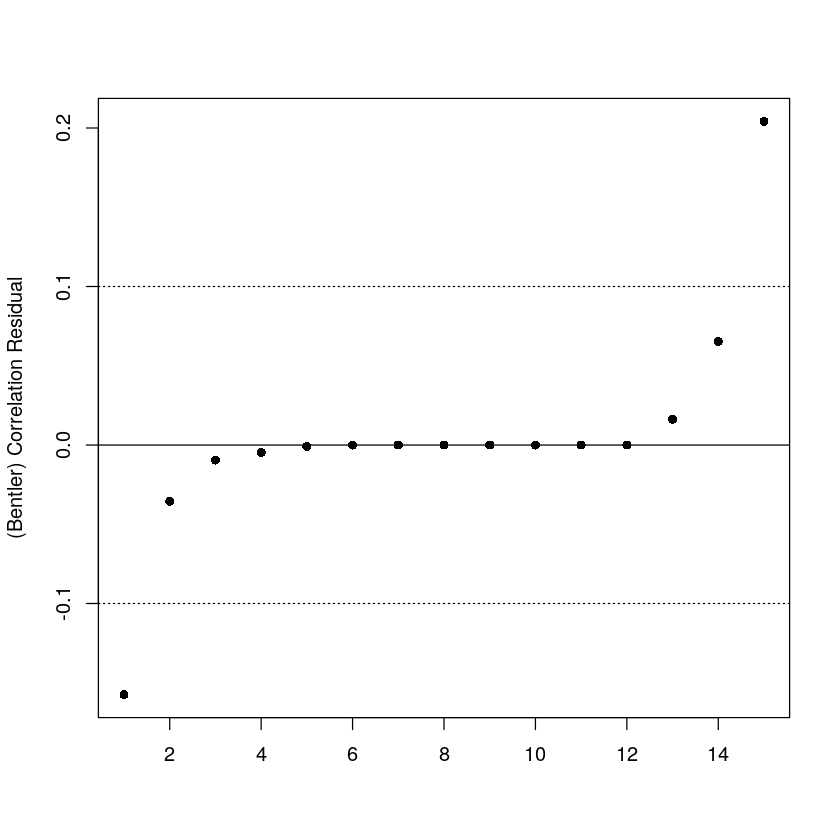

In [13]:
# Extract unique correlation residuals
model.path.fit.resid <- as.data.frame(resid(model.path.fit, type='cor.bentler')$cov)
resid <- model.path.fit.resid[lower.tri(model.path.fit.resid, diag=TRUE)]

summary(resid)

plot(resid[order(resid)], pch=16, xlab='', ylab='(Bentler) Correlation Residual')
abline(h=c(0, -.1, .1), lty=c(1,3,3))

In [14]:
%get model.path.fit.resid --from R
def plot_corr_resid(corr, figsize=None, **kwargs):
    mask = 1 - np.tril(np.ones_like(corr, dtype=np.bool))
    corr_text = np.vectorize('{:.3f}'.format)(corr)
    if figsize is None:
        figsize=np.array([1, 0.75]) * corr.shape[0] + np.array([kwargs.get('cbar', True) * 1.5, 0])
    f, ax = plt.subplots(figsize=figsize)
    cmap = sns.diverging_palette(10, 10, s=50, l=75, sep=100, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, annot=corr_text, fmt='', mask=mask, cmap=cmap, vmin=-0.1, vmax=0.1, 
                square=False, linewidths=.25, **kwargs)
    ax.set_yticklabels(ax.get_yticklabels(), fontdict={'verticalalignment': 'center'})

def save_fig(file, **kwargs):
    path = os.path.join(plot_dir, file)
    plt.savefig(path, metadata={'CreationDate': None})

Variable model.path.fit.resid is put to SoS as model_path_fit_resid


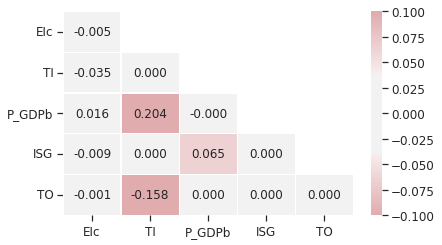

In [15]:
plot_corr_resid(model_path_fit_resid)
save_fig('gbr_correlation_residuals.pdf')

In [16]:
resid <- residuals_lavaan(model.path.fit)$EIc
summary(lm(data.logdiff$EIc ~ resid))
plot(data.logdiff$EIc, resid)

ERROR: Error in model.frame.default(formula = data.logdiff$EIc ~ resid, drop.unused.levels = TRUE): variable lengths differ (found for 'resid')
